In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
from dynascale.challenges.ca import CAChallenge
from dynascale.utils.ca import plot
import cellpylib as cpl
from dynascale.baselines.cnn import CNN

2023-05-16 22:44:40.682494: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


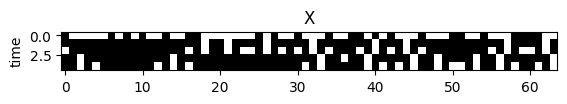

In [5]:
latent_dim = 3
embed_dim = 64
timesteps = 5
n = 100
challenge = CAChallenge(latent_dim, embed_dim, mutation_p=0)
x0 = challenge.make_init_conds(n=n)
x = challenge.make_data(x0, timesteps=timesteps)
plot([x], labels=["X"])

In [115]:
model = CNN(embed_dim, timesteps, max_control_cost=0)
model.fit(x, epochs=100, verbose='auto')

Epoch 1/100
4/4 [==============================] - 2s 70ms/step - loss: 0.1201
Epoch 2/100
4/4 [==============================] - 0s 66ms/step - loss: 0.1091
Epoch 3/100
4/4 [==============================] - 0s 74ms/step - loss: 0.1085
Epoch 4/100
4/4 [==============================] - 0s 78ms/step - loss: 0.1084
Epoch 5/100
4/4 [==============================] - 0s 61ms/step - loss: 0.1083
Epoch 6/100
4/4 [==============================] - 0s 67ms/step - loss: 0.1082
Epoch 7/100
4/4 [==============================] - 0s 61ms/step - loss: 0.1082
Epoch 8/100
4/4 [==============================] - 0s 65ms/step - loss: 0.1081
Epoch 9/100
4/4 [==============================] - 0s 63ms/step - loss: 0.1081
Epoch 10/100
4/4 [==============================] - 0s 64ms/step - loss: 0.1081
Epoch 11/100
4/4 [==============================] - 0s 66ms/step - loss: 0.1081
Epoch 12/100
4/4 [==============================] - 0s 64ms/step - loss: 0.1081
Epoch 13/100
4/4 [==============================]

KeyboardInterrupt: 

  0%|          | 0/99 [00:00<?, ?it/s]

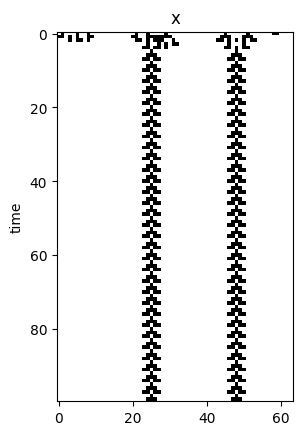

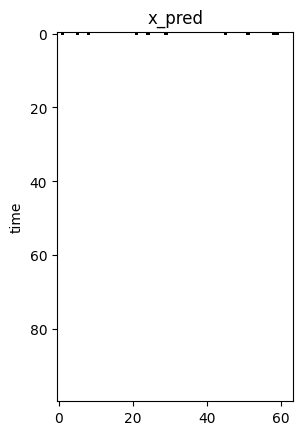

In [116]:
x_pred = model.predict(x0, timesteps=timesteps)
plot([x, x_pred], labels=["x", "x_pred"])

In [79]:
import tensorflow as tf

tf.clip_by_value(x_pred, 0, 1)
tf.math.round(x_pred)

<tf.Tensor: shape=(1000, 10, 64), dtype=float64, numpy=
array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0.